In [1]:
from simulate_ar import *


In [2]:

siminfo = Simulation(Observatory(), ObsSetup(Epoch(55500,0.0),nchan=32,nbin=256,bw=512), Frontend(), Backend(), Pulsar("sample.par"))
siminfo.setup()

Working in /var/folders/4y/fktqs4zs0sd80jg4w42h8fhr0000gp/T/tmpoykjvss2
Call tempo2
tempo2 -pred "MeerKAT 55499.99998842592593 55500.00348379629630 1144.0 1656.0 12 2 3660" -f sim.par
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under conditions of GPL license.

[tempo2Util.C:396] Warning: [PAR2] Have not set a DM epoch. The period epoch will be used instead. sim.par
Calculating predictor >pks<
[tempo2Util.C:396] Warning: [CLK3] no clock corrections available for clock TT(BIPM(2011)) for MJD 53000.0
[tempo2Util.C:396] Warning: [CLK4] Trying assuming UTC = UTC(pks)
[tempo2Util.C:401] Warning: [DUP1] duplicated warnings have been suppressed.
[tempo2Util.C:396] Warning: [CLK5] Trying TT(TAI) instead of  TT(BIPM(2011))
[tempo2Util.C:396] Warning: [CLK9] ... ok, using stated approximation 
[tempo2Util.C:396] Warning: [CLK8] Trying both 
[tempo2Util.C:396] Warning: [CLK6] Proceeding assuming UTC =  UTC(meerkat)
Predictive model

Average 2821 pulses per subint
Generating subint 0/30
phase 0.8790817260742188
Generating subint 1/30
phase 0.87890625
Generating subint 2/30
phase 0.8789138793945312
Generating subint 3/30
phase 0.87890625
Generating subint 4/30
phase 0.87890625
Generating subint 5/30
phase 0.8788986206054688
Generating subint 6/30
phase 0.8785400390625
Generating subint 7/30
phase 0.8787078857421875
Generating subint 8/30
phase 0.878875732421875
Generating subint 9/30
phase 0.8786849975585938
Generating subint 10/30
phase 0.8788528442382812
Generating subint 11/30
phase 0.8788375854492188
Generating subint 12/30
phase 0.8788223266601562
Generating subint 13/30
phase 0.878631591796875
Generating subint 14/30
phase 0.8787918090820312
Generating subint 15/30
phase 0.8787689208984375
Generating subint 16/30
phase 0.878753662109375
Generating subint 17/30
phase 0.8787307739257812
Generating subint 18/30
phase 0.8787078857421875
Generating subint 19/30
phase 0.8790359497070312
Generating subint 20/30
phase

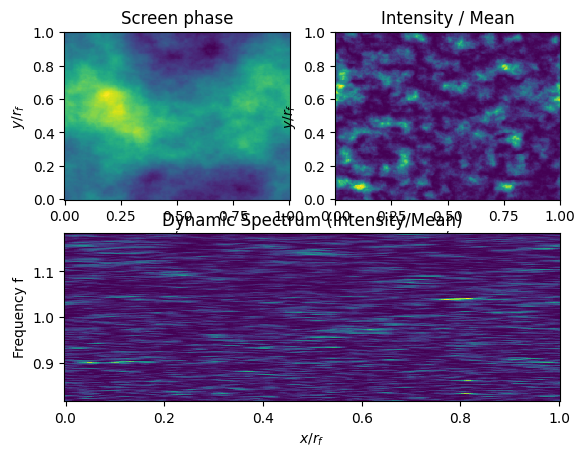

In [3]:
# Do the actual simulation!
components = [profile.VonMisesComponent(0.0,10,1,spectral_index=4),
              profile.VonMisesComponent(0.0,100,2,spectral_index=2),
              profile.VonMisesComponent(-0.1,10,0.2,spectral_index=2),
              profile.VonMisesComponent(0.01,4000,1,spectral_index=1)]

vm = profile.VonMisesProfile(components)
vm.set_flux(2)



navg = int(siminfo.subints[0].tsub/siminfo.subints[0].topo_period)
print(f"Average {navg} pulses per subint")
subpulse_gen = profile.SubPulseGenerator(navg, vm)
subpulse_gen.generate_L(siminfo.obs_setup.nbin)

propagation_model = ism.ScintScatISM(dm=siminfo.pulsar.dm(),scint_bw=1,scint_time=200)

siminfo.generate_data(subpulse_gen,propagation_model)

wn = noise.TsysNoise(gain=1.0)
wn.apply(siminfo)

In [4]:
hdul = siminfo.make_fits()
hdul.writeto("test.fits",overwrite=True)